In [14]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict
if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [15]:
env = BlackjackEnv()

In [16]:
def create_random_policy(nA):
    """
    Creates a random policy function.
    
    Args:
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes an observation as input and returns a vector
        of action probabilities
    """
    A = np.ones(nA, dtype=float) / nA
    def policy_fn(observation):
        return A
    return policy_fn

In [17]:
def create_greedy_policy(Q):
    """
    Creates a greedy policy based on Q values.
    
    Args:
        Q: A dictionary that maps from state -> action values
        
    Returns:
        A function that takes an observation as input and returns a vector
        of action probabilities.
    """
    
    def policy_fn(observation):
        A = np.zeros_like(Q[observation], dtype=float)
        best_action = np.argmax(Q[observation])
        A[best_action] = 1.0
        return A
    return policy_fn

In [29]:
def mc_control_importance_sampling(env, num_episodes, behavior_policy, discount_factor=1.0):
    """
    Monte Carlo Control Off-Policy Control using Weighted Importance Sampling.
    Finds an optimal greedy policy.
    
    Args:
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        behavior_policy: The behavior to follow while generating episodes.
            A function that given an observation returns a vector of probabilities for each action.
        discount_factor: Gamma discount factor.
    
    Returns:
        A tuple (Q, policy).
        Q is a dictionary mapping state -> action values.
        policy is a function that takes an observation as an argument and returns
        action probabilities. This is the optimal greedy policy.
    """
    def update_target_policy(episodes):
        G = 0
        W = 1
        t = len(episodes)
        for i in range(t - 1, -1, -1):
            obs, action, reward = episodes[i]
            G = discount_factor * G + reward
            C[obs][action] = C[obs][action] + W
            Q[obs][action] = Q[obs][action] + W / C[obs][action] * (G - Q[obs][action])
            behaviour_prob = behavior_policy(obs)[action]
            if action != np.argmax(target_policy(obs)):
                break
            W = W * 1.0 / behaviour_prob 
    
    # The final action-value function.
    # A dictionary that maps state -> action values
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    C = defaultdict(lambda: np.zeros(env.action_space.n))
    # Our greedily policy we want to learn
    target_policy = create_greedy_policy(Q)
    for _ in range(1, num_episodes + 1):
        if _ % 1000 == 0:
            print("\rEpisode {}/{}.".format(_, num_episodes), end="")
            sys.stdout.flush()
        episodes = []
        obs = env.reset()
        for __ in range(100):
            action = np.random.choice(np.arange(env.nA), 1, False, behavior_policy(obs))[0]
            next_obs, reward, done, _ = env.step(action)
            episodes.append((obs, action, reward))
            if done is True:
                break
            obs = next_obs
        update_target_policy(episodes)
            
    # Implement this!
        
    return Q, target_policy

In [30]:
random_policy = create_random_policy(env.action_space.n)
Q, policy = mc_control_importance_sampling(env, num_episodes=500000, behavior_policy=random_policy)

Episode 1000/500000.

Episode 2000/500000.

Episode 3000/500000.

Episode 4000/500000.

Episode 5000/500000.

Episode 6000/500000.

Episode 7000/500000.

Episode 8000/500000.

Episode 9000/500000.

Episode 10000/500000.

Episode 11000/500000.

Episode 12000/500000.

Episode 13000/500000.

Episode 14000/500000.

Episode 15000/500000.

Episode 16000/500000.

Episode 17000/500000.

Episode 18000/500000.

Episode 19000/500000.

Episode 20000/500000.

Episode 21000/500000.

Episode 22000/500000.

Episode 23000/500000.

Episode 24000/500000.

Episode 25000/500000.

Episode 26000/500000.

Episode 27000/500000.

Episode 28000/500000.

Episode 29000/500000.

Episode 30000/500000.

Episode 31000/500000.

Episode 32000/500000.

Episode 33000/500000.

Episode 34000/500000.

Episode 35000/500000.

Episode 36000/500000.

Episode 37000/500000.

Episode 38000/500000.

Episode 39000/500000.

Episode 40000/500000.

Episode 41000/500000.

Episode 42000/500000.

Episode 43000/500000.

Episode 44000/500000.

Episode 45000/500000.

Episode 46000/500000.

Episode 47000/500000.

Episode 48000/500000.

Episode 49000/500000.

Episode 50000/500000.

Episode 51000/500000.

Episode 52000/500000.

Episode 53000/500000.

Episode 54000/500000.

Episode 55000/500000.

Episode 56000/500000.

Episode 57000/500000.

Episode 58000/500000.

Episode 59000/500000.

Episode 60000/500000.

Episode 61000/500000.

Episode 62000/500000.

Episode 63000/500000.

Episode 64000/500000.

Episode 65000/500000.

Episode 66000/500000.

Episode 67000/500000.

Episode 68000/500000.

Episode 69000/500000.

Episode 70000/500000.

Episode 71000/500000.

Episode 72000/500000.

Episode 73000/500000.

Episode 74000/500000.

Episode 75000/500000.

Episode 76000/500000.

Episode 77000/500000.

Episode 78000/500000.

Episode 79000/500000.

Episode 80000/500000.

Episode 81000/500000.

Episode 82000/500000.

Episode 83000/500000.

Episode 84000/500000.

Episode 85000/500000.

Episode 86000/500000.

Episode 87000/500000.

Episode 88000/500000.

Episode 89000/500000.

Episode 90000/500000.

Episode 91000/500000.

Episode 92000/500000.

Episode 93000/500000.

Episode 94000/500000.

Episode 95000/500000.

Episode 96000/500000.

Episode 97000/500000.

Episode 98000/500000.

Episode 99000/500000.

Episode 100000/500000.

Episode 101000/500000.

Episode 102000/500000.

Episode 103000/500000.

Episode 104000/500000.

Episode 105000/500000.

Episode 106000/500000.

Episode 107000/500000.

Episode 108000/500000.

Episode 109000/500000.

Episode 110000/500000.

Episode 111000/500000.

Episode 112000/500000.

Episode 113000/500000.

Episode 114000/500000.

Episode 115000/500000.

Episode 116000/500000.

Episode 117000/500000.

Episode 118000/500000.

Episode 119000/500000.

Episode 120000/500000.

Episode 121000/500000.

Episode 122000/500000.

Episode 123000/500000.

Episode 124000/500000.

Episode 125000/500000.

Episode 126000/500000.

Episode 127000/500000.

Episode 128000/500000.

Episode 129000/500000.

Episode 130000/500000.

Episode 131000/500000.

Episode 132000/500000.

Episode 133000/500000.

Episode 134000/500000.

Episode 135000/500000.

Episode 136000/500000.

Episode 137000/500000.

Episode 138000/500000.

Episode 139000/500000.

Episode 140000/500000.

Episode 141000/500000.

Episode 142000/500000.

Episode 143000/500000.

Episode 144000/500000.

Episode 145000/500000.

Episode 146000/500000.

Episode 147000/500000.

Episode 148000/500000.

Episode 149000/500000.

Episode 150000/500000.

Episode 151000/500000.

Episode 152000/500000.

Episode 153000/500000.

Episode 154000/500000.

Episode 155000/500000.

Episode 156000/500000.

Episode 157000/500000.

Episode 158000/500000.

Episode 159000/500000.

Episode 160000/500000.

Episode 161000/500000.

Episode 162000/500000.

Episode 163000/500000.

Episode 164000/500000.

Episode 165000/500000.

Episode 166000/500000.

Episode 167000/500000.

Episode 168000/500000.

Episode 169000/500000.

Episode 170000/500000.

Episode 171000/500000.

Episode 172000/500000.

Episode 173000/500000.

Episode 174000/500000.

Episode 175000/500000.

Episode 176000/500000.

Episode 177000/500000.

Episode 178000/500000.

Episode 179000/500000.

Episode 180000/500000.

Episode 181000/500000.

Episode 182000/500000.

Episode 183000/500000.

Episode 184000/500000.

Episode 185000/500000.

Episode 186000/500000.

Episode 187000/500000.

Episode 188000/500000.

Episode 189000/500000.

Episode 190000/500000.

Episode 191000/500000.

Episode 192000/500000.

Episode 193000/500000.

Episode 194000/500000.

Episode 195000/500000.

Episode 196000/500000.

Episode 197000/500000.

Episode 198000/500000.

Episode 199000/500000.

Episode 200000/500000.

Episode 201000/500000.

Episode 202000/500000.

Episode 203000/500000.

Episode 204000/500000.

Episode 205000/500000.

Episode 206000/500000.

Episode 207000/500000.

Episode 208000/500000.

Episode 209000/500000.

Episode 210000/500000.

Episode 211000/500000.

Episode 212000/500000.

Episode 213000/500000.

Episode 214000/500000.

Episode 215000/500000.

Episode 216000/500000.

Episode 217000/500000.

Episode 218000/500000.

Episode 219000/500000.

Episode 220000/500000.

Episode 221000/500000.

Episode 222000/500000.

Episode 223000/500000.

Episode 224000/500000.

Episode 225000/500000.

Episode 226000/500000.

Episode 227000/500000.

Episode 228000/500000.

Episode 229000/500000.

Episode 230000/500000.

Episode 231000/500000.

Episode 232000/500000.

Episode 233000/500000.

Episode 234000/500000.

Episode 235000/500000.

Episode 236000/500000.

Episode 237000/500000.

Episode 238000/500000.

Episode 239000/500000.

Episode 240000/500000.

Episode 241000/500000.

Episode 242000/500000.

Episode 243000/500000.

Episode 244000/500000.

Episode 245000/500000.

Episode 246000/500000.

Episode 247000/500000.

Episode 248000/500000.

Episode 249000/500000.

Episode 250000/500000.

Episode 251000/500000.

Episode 252000/500000.

Episode 253000/500000.

Episode 254000/500000.

Episode 255000/500000.

Episode 256000/500000.

Episode 257000/500000.

Episode 258000/500000.

Episode 259000/500000.

Episode 260000/500000.

Episode 261000/500000.

Episode 262000/500000.

Episode 263000/500000.

Episode 264000/500000.

Episode 265000/500000.

Episode 266000/500000.

Episode 267000/500000.

Episode 268000/500000.

Episode 269000/500000.

Episode 270000/500000.

Episode 271000/500000.

Episode 272000/500000.

Episode 273000/500000.

Episode 274000/500000.

Episode 275000/500000.

Episode 276000/500000.

Episode 277000/500000.

Episode 278000/500000.

Episode 279000/500000.

Episode 280000/500000.

Episode 281000/500000.

Episode 282000/500000.

Episode 283000/500000.

Episode 284000/500000.

Episode 285000/500000.

Episode 286000/500000.

Episode 287000/500000.

Episode 288000/500000.

Episode 289000/500000.

Episode 290000/500000.

Episode 291000/500000.

Episode 292000/500000.

Episode 293000/500000.

Episode 294000/500000.

Episode 295000/500000.

Episode 296000/500000.

Episode 297000/500000.

Episode 298000/500000.

Episode 299000/500000.

Episode 300000/500000.

Episode 301000/500000.

Episode 302000/500000.

Episode 303000/500000.

Episode 304000/500000.

Episode 305000/500000.

Episode 306000/500000.

Episode 307000/500000.

Episode 308000/500000.

Episode 309000/500000.

Episode 310000/500000.

Episode 311000/500000.

Episode 312000/500000.

Episode 313000/500000.

Episode 314000/500000.

Episode 315000/500000.

Episode 316000/500000.

Episode 317000/500000.

Episode 318000/500000.

Episode 319000/500000.

Episode 320000/500000.

Episode 321000/500000.

Episode 322000/500000.

Episode 323000/500000.

Episode 324000/500000.

Episode 325000/500000.

Episode 326000/500000.

Episode 327000/500000.

Episode 328000/500000.

Episode 329000/500000.

Episode 330000/500000.

Episode 331000/500000.

Episode 332000/500000.

Episode 333000/500000.

Episode 334000/500000.

Episode 335000/500000.

Episode 336000/500000.

Episode 337000/500000.

Episode 338000/500000.

Episode 339000/500000.

Episode 340000/500000.

Episode 341000/500000.

Episode 342000/500000.

Episode 343000/500000.

Episode 344000/500000.

Episode 345000/500000.

Episode 346000/500000.

Episode 347000/500000.

Episode 348000/500000.

Episode 349000/500000.

Episode 350000/500000.

Episode 351000/500000.

Episode 352000/500000.

Episode 353000/500000.

Episode 354000/500000.

Episode 355000/500000.

Episode 356000/500000.

Episode 357000/500000.

Episode 358000/500000.

Episode 359000/500000.

Episode 360000/500000.

Episode 361000/500000.

Episode 362000/500000.

Episode 363000/500000.

Episode 364000/500000.

Episode 365000/500000.

Episode 366000/500000.

Episode 367000/500000.

Episode 368000/500000.

Episode 369000/500000.

Episode 370000/500000.

Episode 371000/500000.

Episode 372000/500000.

Episode 373000/500000.

Episode 374000/500000.

Episode 375000/500000.

Episode 376000/500000.

Episode 377000/500000.

Episode 378000/500000.

Episode 379000/500000.

Episode 380000/500000.

Episode 381000/500000.

Episode 382000/500000.

Episode 383000/500000.

Episode 384000/500000.

Episode 385000/500000.

Episode 386000/500000.

Episode 387000/500000.

Episode 388000/500000.

Episode 389000/500000.

Episode 390000/500000.

Episode 391000/500000.

Episode 392000/500000.

Episode 393000/500000.

Episode 394000/500000.

Episode 395000/500000.

Episode 396000/500000.

Episode 397000/500000.

Episode 398000/500000.

Episode 399000/500000.

Episode 400000/500000.

Episode 401000/500000.

Episode 402000/500000.

Episode 403000/500000.

Episode 404000/500000.

Episode 405000/500000.

Episode 406000/500000.

Episode 407000/500000.

Episode 408000/500000.

Episode 409000/500000.

Episode 410000/500000.

Episode 411000/500000.

Episode 412000/500000.

Episode 413000/500000.

Episode 414000/500000.

Episode 415000/500000.

Episode 416000/500000.

Episode 417000/500000.

Episode 418000/500000.

Episode 419000/500000.

Episode 420000/500000.

Episode 421000/500000.

Episode 422000/500000.

Episode 423000/500000.

Episode 424000/500000.

Episode 425000/500000.

Episode 426000/500000.

Episode 427000/500000.

Episode 428000/500000.

Episode 429000/500000.

Episode 430000/500000.

Episode 431000/500000.

Episode 432000/500000.

Episode 433000/500000.

Episode 434000/500000.

Episode 435000/500000.

Episode 436000/500000.

Episode 437000/500000.

Episode 438000/500000.

Episode 439000/500000.

Episode 440000/500000.

Episode 441000/500000.

Episode 442000/500000.

Episode 443000/500000.

Episode 444000/500000.

Episode 445000/500000.

Episode 446000/500000.

Episode 447000/500000.

Episode 448000/500000.

Episode 449000/500000.

Episode 450000/500000.

Episode 451000/500000.

Episode 452000/500000.

Episode 453000/500000.

Episode 454000/500000.

Episode 455000/500000.

Episode 456000/500000.

Episode 457000/500000.

Episode 458000/500000.

Episode 459000/500000.

Episode 460000/500000.

Episode 461000/500000.

Episode 462000/500000.

Episode 463000/500000.

Episode 464000/500000.

Episode 465000/500000.

Episode 466000/500000.

Episode 467000/500000.

Episode 468000/500000.

Episode 469000/500000.

Episode 470000/500000.

Episode 471000/500000.

Episode 472000/500000.

Episode 473000/500000.

Episode 474000/500000.

Episode 475000/500000.

Episode 476000/500000.

Episode 477000/500000.

Episode 478000/500000.

Episode 479000/500000.

Episode 480000/500000.

Episode 481000/500000.

Episode 482000/500000.

Episode 483000/500000.

Episode 484000/500000.

Episode 485000/500000.

Episode 486000/500000.

Episode 487000/500000.

Episode 488000/500000.

Episode 489000/500000.

Episode 490000/500000.

Episode 491000/500000.

Episode 492000/500000.

Episode 493000/500000.

Episode 494000/500000.

Episode 495000/500000.

Episode 496000/500000.

Episode 497000/500000.

Episode 498000/500000.

Episode 499000/500000.

Episode 500000/500000.

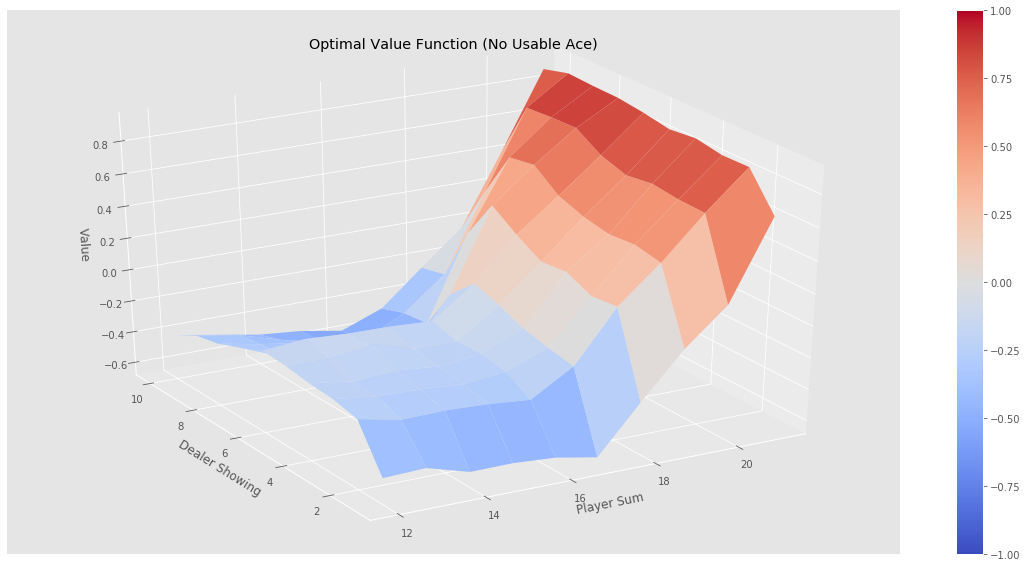

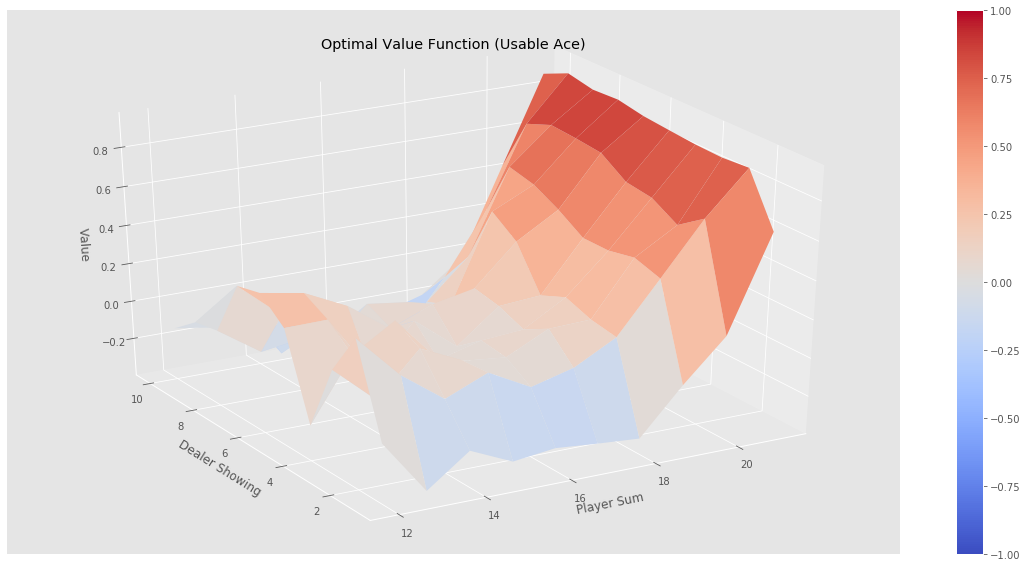

In [31]:
# For plotting: Create value function from action-value function
# by picking the best action at each state
V = defaultdict(float)
for state, action_values in Q.items():
    action_value = np.max(action_values)
    V[state] = action_value
plotting.plot_value_function(V, title="Optimal Value Function")